# Linear Regression with Numpy
We compute the regression line linking counts of letters in a text to counts of letter a. 

Author: Pierre Nugues

## Modules
We import the modules we need to run the program

In [3]:
import random
import numpy as np
import datasets
import matplotlib.pyplot as plt

## Function to compute the sum of squared errors

In [4]:
def sse(X, y, w):
    error = y - X @ w
    return error.T @ error

## Function to normalize the data

In [6]:
def normalize(Xy):
    maxima = np.amax(Xy, axis=0)
    D = np.diag(maxima)
    D_inv = np.linalg.inv(D)
    Xy = Xy @ D_inv
    return (Xy, maxima)

## Function to predict values

In [7]:
def predict(X, w):
    return X @ w

## Stochastic descent
Function to apply a stochastic descent

In [8]:
def fit_stoch(X, y, alpha, w,
                  epochs=500,
                  epsilon=1.0e-5):
    """
    Stochastic gradient descent
    :param X:
    :param y:
    :param alpha:
    :param w:
    :param epochs:
    :param epsilon:
    :return:
    """
    global logs, logs_stoch
    logs = []
    logs_stoch = []
    random.seed(0)
    idx = list(range(len(X)))
    for epoch in range(epochs):
        random.shuffle(idx)
        for i in idx:
            loss = y[i] - predict(X[i], w)[0]
            gradient = loss * np.array([X[i]]).T
            w = w + alpha * gradient
            logs_stoch += (w, alpha, sse(X, y, w))
        if np.linalg.norm(gradient) < epsilon:
            break
        logs += (w, alpha, sse(X, y, w))
    print("Epoch", epoch)
    return w

## Batch descent
Function to apply a batch descent

In [9]:
def fit_batch(X, y, alpha, w,
                  epochs=500,
                  epsilon=1.0e-5):
    """
    Batch gradient descent
    :param X:
    :param y:
    :param alpha:
    :param w:
    :param epochs:
    :param epsilon:
    :return:
    """
    global logs
    logs = []
    alpha /= len(X)
    for epoch in range(epochs):
        loss = y - predict(X, w)
        gradient = X.T @ loss
        w = w + alpha * gradient
        logs += (w, alpha, sse(X, y, w))
        if np.linalg.norm(gradient) < epsilon:
            break
    print("Epoch", epoch)
    return w

## We load the data and we possibly normalize it

The English dataset

In [10]:
X = [[1, 35680.0],
     [1, 42514.0],
     [1, 15162.0],
     [1, 35298.0],
     [1, 29800.0],
     [1, 40255.0],
     [1, 74532.0],
     [1, 37464.0],
     [1, 31030.0],
     [1, 24843.0],
     [1, 36172.0],
     [1, 39552.0],
     [1, 72545.0],
     [1, 75352.0],
     [1, 18031.0]]

In [11]:
y = [2217.0,
     2761.0,
     990.0,
     2274.0,
     1865.0,
     2606.0,
     4805.0,
     2396.0,
     1993.0,
     1627.0,
     2375.0,
     2560.0,
     4597.0,
     4871.0,
     1119.0]

In [12]:
normalized = True
debug = False
# Predictors
X = np.array(X)
# Response
y = np.array([y]).T

alpha = 1.0e-10
if normalized:
    X, maxima_X = normalize(X)
    y, maxima_y = normalize(y)
    maxima = np.concatenate((maxima_X, maxima_y))
    alpha = 1.0
    print("-Normalized-")

-Normalized-


## We apply a batch descent

In [13]:
print("===Batch descent===")
w = np.zeros(X.shape[1]).reshape((-1, 1))
w = fit_batch(X, y, alpha, w)
print("Weights", w)
print("SSE", sse(X, y, w))
if normalized:
    maxima = maxima.reshape(-1, 1)
    w = maxima[-1, 0] * (w / maxima[:-1, 0:1])
    print("Restored weights", w)
if debug:
    print("Logs", logs)

===Batch descent===
Epoch 235
Weights [[-7.31744724e-04]
 [ 9.94697306e-01]]
SSE [[0.00086294]]
Restored weights [[-3.56432855]
 [ 0.06430049]]


## We restore the coordinates

In [14]:
x_fig = [X[i][1] * maxima_X[1] for i in range(len(X))]
y_fig = [yi * maxima_y for yi in y]

## We plot the coordinates and the line

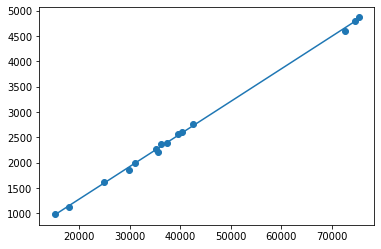

In [15]:
plt.scatter(x_fig, y_fig)
plt.plot([min(x_fig), max(x_fig)],
         [[1, min(x_fig)] @ w, [1, max(x_fig)] @ w])
plt.show()

## Showing the iterations

### The errors

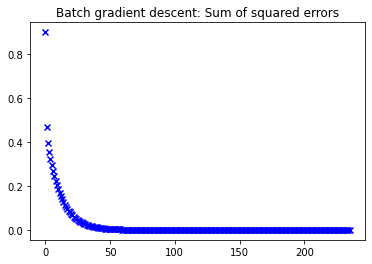

In [16]:
plt.scatter(range(len(logs[2::3])), logs[2::3], c='b', marker='x')
plt.title("Batch gradient descent: Sum of squared errors")
plt.show()

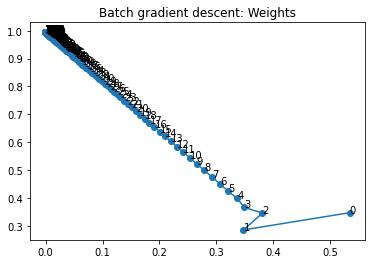

In [17]:
plt.plot(list(map(lambda pair: pair[0], logs[0::3])), list(map(lambda pair: pair[1], logs[0::3])), marker='o')
for i in range(len(logs[0::3])):
    plt.annotate(i, xy=logs[0::3][i])
plt.title("Batch gradient descent: Weights")
plt.show()

## We apply a stochastic descent

In [18]:
print("===Stochastic descent===")
w = np.zeros(X.shape[1]).reshape((-1, 1))
w = fit_stoch(X, y, alpha, w)
print("Weights", w)
print("SSE", sse(X, y, w))
if normalized:
    maxima = maxima.reshape(-1, 1)
    w = maxima[-1, 0] * (w / maxima[:-1, 0:1])
    print("Restored weights", w)
if debug:
    print("Logs", logs)
    print("Logs stoch.", logs_stoch)

===Stochastic descent===
Epoch 499
Weights [[0.00339067]
 [0.99373072]]
SSE [[0.00105848]]
Restored weights [[16.51596702]
 [ 0.06423801]]


## We plot the line

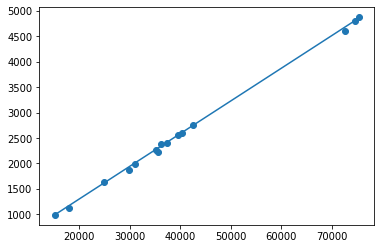

In [19]:
plt.scatter(x_fig, y_fig)
plt.plot([min(x_fig), max(x_fig)],
         [[1, min(x_fig)] @ w, [1, max(x_fig)] @ w])
plt.show()

## Showing the iterations

### The errors by epoch

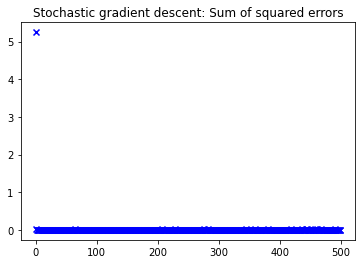

In [17]:
plt.scatter(range(len(logs[2::3])), logs[2::3], c='b', marker='x')
plt.title("Stochastic gradient descent: Sum of squared errors")
plt.show()

### The weight updates by epoch

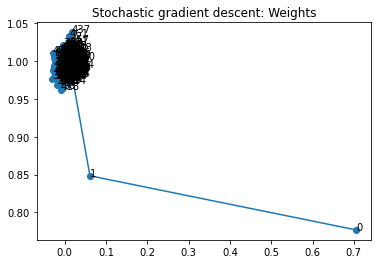

In [18]:
plt.plot(list(map(lambda pair: pair[0], logs[0::3])), list(map(lambda pair: pair[1], logs[0::3])), marker='o')
for i in range(len(logs[0::3])):
    plt.annotate(i, xy=logs[0::3][i])
plt.title("Stochastic gradient descent: Weights")
plt.show()

### The weight updates

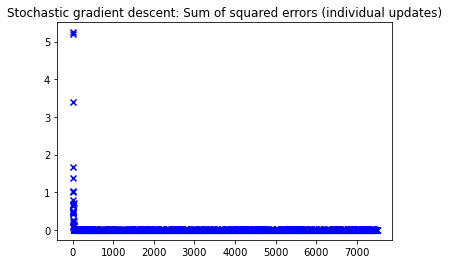

In [19]:
plt.scatter(range(len(logs_stoch[2::3])), logs_stoch[2::3], c='b', marker='x')
plt.title("Stochastic gradient descent: Sum of squared errors (individual updates)")
plt.show()

### The weight updates by individual update

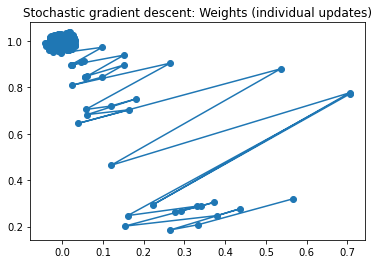

In [20]:
plt.plot(list(map(lambda pair: pair[0], logs_stoch[0::3])), list(map(lambda pair: pair[1], logs_stoch[0::3])),
         marker='o')
plt.title("Stochastic gradient descent: Weights (individual updates)")
plt.show()